In [0]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [0]:
# import libraries

import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
import os
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
# batch, classes, epochs

batch_size = 32
num_classes = 10
epochs = 50

In [22]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape: ', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape:  (50000, 32, 32, 3)
50000 train samples
10000 test samples


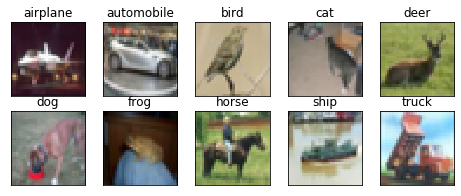

In [23]:
# plotting some random 10 images

class_names = ['airplane',
               'automobile',
               'bird',
               'cat',
               'deer',
               'dog',
               'frog',
               'horse',
               'ship',
               'truck']
               
fig = plt.figure(figsize=(8, 3))
for i in range(num_classes):
  ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
  idx = np.where(y_train[:] == i)[0]
  feature_idx = x_train[idx, ::]
  img_num = np.random.randint(feature_idx.shape[0])
  im = (feature_idx[img_num, ::])
  ax.set_title(class_names[i])
  plt.imshow(im)
plt.show()

In [0]:
# Convert class vectors to binary class metrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes) 

In [0]:
# model architecture
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [26]:
#summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_10 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)       

In [27]:
# compile the model
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'sgd',
              metrics=['accuracy'])

# convert to float, normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [28]:
# train
model.fit(x_train, y_train, 
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 19s 385us/step - loss: 1.6752 - acc: 0.4177 - val_loss: 1.7190 - val_acc: 0.4187
Epoch 2/50
50000/50000 [==============================] - 12s 243us/step - loss: 1.2364 - acc: 0.5589 - val_loss: 1.1555 - val_acc: 0.5904
Epoch 3/50
50000/50000 [==============================] - 12s 245us/step - loss: 1.0805 - acc: 0.6154 - val_loss: 0.9523 - val_acc: 0.6652
Epoch 4/50
50000/50000 [==============================] - 12s 246us/step - loss: 0.9742 - acc: 0.6538 - val_loss: 0.9490 - val_acc: 0.6710
Epoch 5/50
50000/50000 [==============================] - 13s 252us/step - loss: 0.8988 - acc: 0.6810 - val_loss: 0.8703 - val_acc: 0.6888
Epoch 6/50
50000/50000 [==============================] - 12s 243us/step - loss: 0.8388 - acc: 0.7031 - val_loss: 0.7961 - val_acc: 0.7169
Epoch 7/50
50000/500

Result : After 50 epochs, the difference between training and validation accuracy is low but the training is slow as compared to the model with batch normalization.  